In [39]:
import sys
import numpy
import matplotlib
import pandas
import sklearn



print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('matplotlib: {}'.format(matplotlib.__version__))
print('pandas: {}'.format(pandas.__version__))
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
Numpy: 1.18.1
matplotlib: 3.1.3
pandas: 1.0.1
sklearn: 0.22.1


In [95]:
import numpy as np
from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [96]:
#loading the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
names = [ 'id','clump_thickness','uniform_cell_size','uniform_cell_shape',
        'marginal_adhesion','single_epithilial_size','bare_nuclei'
        'bland_chromatin','normal_nucleoli','mitoses','class']
df = pd.read_csv(url, names=names)

In [13]:
# Preprocess the data
df.replace('?', -99999, inplace=True)
print(df.axes)

#print the shape of the dataset
print(df.shape)

[Int64Index([1000025, 1002945, 1015425, 1016277, 1017023, 1017122, 1018099,
            1018561, 1033078, 1033078,
            ...
             654546,  654546,  695091,  714039,  763235,  776715,  841769,
             888820,  897471,  897471],
           dtype='int64', length=699), Index(['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape',
       'marginal_adhesion', 'single_epithilial_size',
       'bare_nucleibland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')]
(699, 10)


In [21]:
#data visualisation
print(df.iloc[0])
print(df.describe())

id                            5
clump_thickness               1
uniform_cell_size             1
uniform_cell_shape            1
marginal_adhesion             2
single_epithilial_size        1
bare_nucleibland_chromatin    3
normal_nucleoli               1
mitoses                       1
class                         2
Name: 1000025, dtype: object
               id  clump_thickness  uniform_cell_size  uniform_cell_shape  \
count  699.000000       699.000000         699.000000          699.000000   
mean     4.417740         3.134478           3.207439            2.806867   
std      2.815741         3.051459           2.971913            2.855379   
min      1.000000         1.000000           1.000000            1.000000   
25%      2.000000         1.000000           1.000000            1.000000   
50%      4.000000         1.000000           1.000000            1.000000   
75%      6.000000         5.000000           5.000000            4.000000   
max     10.000000        10.000000 

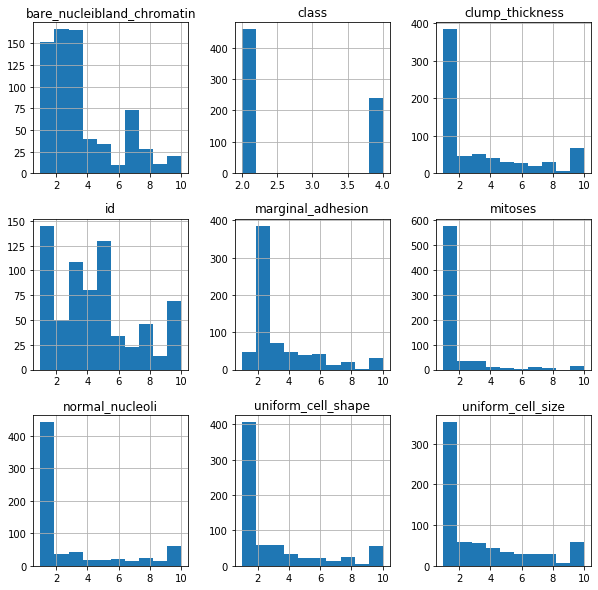

In [22]:
# Plot Histograms for each variables
df.hist(figsize = (10,10))
plt.show()

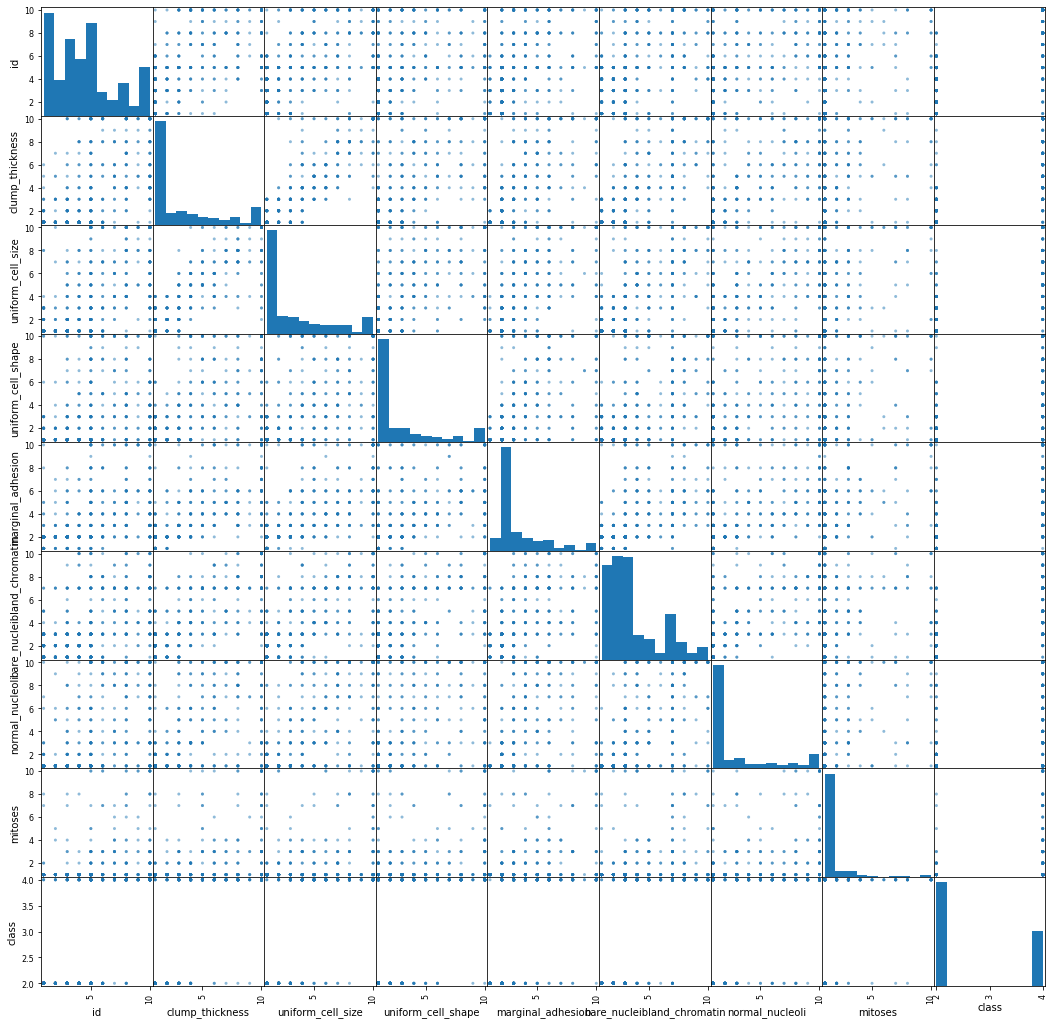

In [23]:
scatter_matrix(df, figsize = (18,18))
plt.show()

In [57]:
# Create X and Y datasets for Training
X = np.array(df.drop(['class'],1))
Y = np.array(df['class'])
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [105]:
#Specify testing options
seed = 9
scoring = 'accuracy'

In [106]:
#Define the models to train
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(X,Y)
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM',SVC()))


#Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
   

KNN: 0.967825 (0.023671)
SVM: 0.654740 (0.074488)


In [111]:
#Make Predictions on validation dataset

for name, model in models:
  model.fit(X_train,Y_train)
  predictions = model.predict(X_test)
  print(name)
  print(accuracy_score(Y_test,predictions))
  print(classification_report(Y_test,predictions))

KNN
0.9857142857142858
              precision    recall  f1-score   support

           2       1.00      0.98      0.99        92
           4       0.96      1.00      0.98        48

    accuracy                           0.99       140
   macro avg       0.98      0.99      0.98       140
weighted avg       0.99      0.99      0.99       140

SVM
0.6571428571428571
              precision    recall  f1-score   support

           2       0.66      1.00      0.79        92
           4       0.00      0.00      0.00        48

    accuracy                           0.66       140
   macro avg       0.33      0.50      0.40       140
weighted avg       0.43      0.66      0.52       140



C:\Users\KIIT\.PyCharmCE2019.3\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [116]:
clf = SVC()

clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
print(accuracy)

example = np.array([[4,2,1,1,1,2,3,2,4]])
example = example.reshape(len(example),-1)
prediction = clf.predict(example)
print(prediction)

0.6571428571428571
[2]
